In [0]:
import pandas as pd
import numpy as np
from pandas_datareader.data import DataReader
from datetime import datetime
import matplotlib.pyplot as plt
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error

In [0]:
# The tech stocks we'll use
tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN']

# Set up End and Start times for data grab
end = datetime.now()
start = datetime(end.year - 5, end.month, end.day)

#For loop for grabing yahoo finance data and setting as a dataframe
for stock in tech_list:   
    
    globals()[stock] = DataReader(stock, 'yahoo', start, end)

In [43]:

company_list = [AAPL, GOOG, MSFT, AMZN]
company_name = ["APPLE", "GOOGLE", "MICROSOFT", "AMAZON"]

for company, com_name in zip(company_list, company_name):
    company["company_name"] = com_name
    
df = pd.concat(company_list, axis=0)
df.head()

,High,Low,Open,Close,Volume,Adj Close,company_name
Date,,,,,,,
2015-05-11,127.559998,125.629997,127.389999,126.320000,42035800.0,116.417625,APPLE
2015-05-12,126.879997,124.820000,125.599998,125.870003,48160000.0,116.002884,APPLE
2015-05-13,127.190002,125.870003,126.150002,126.010002,34694200.0,116.131927,APPLE
2015-05-14,128.949997,127.160004,127.410004,128.949997,45203500.0,118.841446,APPLE
2015-05-15,129.490005,128.210007,129.070007,128.770004,38208000.0,118.675552,APPLE


In [0]:
df_apple = AAPL.filter(['Close'])
train_data, test_data = df_apple[0:int(len(df_apple)*0.8)], df_apple[int(len(df_apple)*0.8):]

In [125]:
train_ar = train_data['Close'].values
test_ar = test_data['Close'].values
history = [x for x in train_ar]
predictions = list()
for t in range(len(test_ar)):
    model = ARIMA(history, order=(5,1,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test_ar[t]
    history.append(obs)
error = mean_squared_error(test_ar, predictions)
print('Testing Mean Squared Error: %.3f' % error)

Testing Mean Squared Error: 44.238


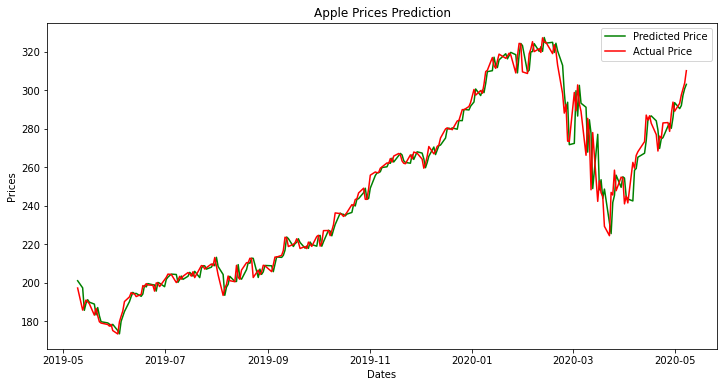

In [129]:
plt.figure(figsize = (12,6))
plt.plot(test_data.index, predictions, color='green', label='Predicted Price')
plt.plot(test_data.index, test_data['Close'], color='red', label='Actual Price')
plt.title('Apple Prices Prediction')
plt.xlabel('Dates')
plt.ylabel('Prices')
plt.legend()

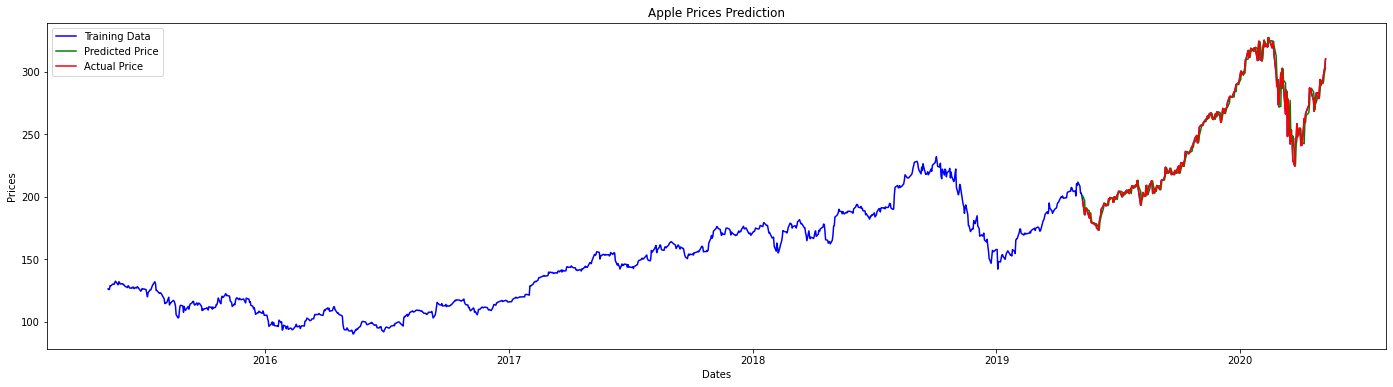

In [132]:
plt.figure(figsize = (24,6))
plt.plot(df_apple['Close'], 'green', color='blue', label='Training Data')
plt.plot(test_data.index, predictions, color='green', label='Predicted Price')
plt.plot(test_data.index, test_data['Close'], color='red', label='Actual Price')
plt.title('Apple Prices Prediction')
plt.xlabel('Dates')
plt.ylabel('Prices')
plt.legend()